In [ ]:
import tensorflow as tf
#Print number of working GPUs
physical_devices = tf.config.list_physical_devices('GPU')
print("NumGPUs:", len(physical_devices))

NumGPUs: 1


In [ ]:
from google.colab import drive
#Connect to google drive to access sample data
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#get images from google drive
import os
from IPython.display import Image as disImage
from PIL import Image
#Concatenate path components
directory = "/content/drive/My Drive/SampleMoviePosters/"
for dirname, _, filenames in os.walk(directory):
    for file in filenames:
        os.path.join(dirname, file)
        #print(dirname)
        #print(file)

In [ ]:
import glob
#Retrieve filenames (jpegs) and place into id_list array
id_list = []
for filename in glob.iglob(f'{directory}/*'):
    f = filename.split('/')
    id_list.append(f[-1][:-4])
    #print(f[-1][:-4])

In [ ]:
#get posters as np arrays
import numpy as np
#Reference each jpeg by size and RGB values and place into image_array
shape = (268,182,3)
image_array = []
for each in id_list:
    img = Image.open('/content/drive/My Drive/SampleMoviePosters/'+each+'.jpg')
    image_array.append(np.array(img))
    #print(type(img))


In [ ]:
#create dictionaries
import csv
#Parse through csv table sorting each entry by ID, Genre, Title and adding to dictionaries
id_genre_dict = {}
title_dict = {}
with open("/content/drive/My Drive/MovieGenre.csv", newline='',encoding = "ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    #Iterate through rows in input and update dictionaries with array indexes 
    for row in reader:
        movie_id = row[0]
        gen = row[4]
        title = row[2]
        #Create list from string using '|' seperator
        gen_split = gen.split('|')
        id_genre_dict.update({movie_id:gen_split})
        title_dict.update({movie_id:title})
        #print(row)

In [ ]:
genres = id_genre_dict.values()
#Iterate through lists in genre dictionary
genres = [item for sublist in genres for item in sublist]
#Create sequence of distinct (non-repeating) unordered elements 
genres = set(genres)
#Create array of genre elements
genres = list(genres)
genres.remove('')
genres.remove('Genre')
#Ordered genres from a-z
genres.sort()
#print(genres)

In [ ]:
arr_y = []
for each in id_list:
    #Create numpy array of zeros whose length = # of genres
    y_each = np.zeros(len(genres))
    #Iterate through each array entry
    gens = id_genre_dict[each]
    for i in gens:
        #Place 1 in specified genre index if true, else place 0
        y_each[genres.index(i)] = 1
        arr_y.append(y_each)
#id_genre_dict[id_list[0]], arr_y[0]

In [ ]:
#Convert image to np array, gives RGB value of each pixel
img = np.asarray(image_array)
np.save('X.npy',img)
#Converts each image genre array into np array
y = np.asarray(arr_y)
np.save('Y',y)
#print(img)
#print(y)

In [ ]:
#Plain stack of layers, each layer has exactly one input tensor and one output tensor
#Model has one output, layers are computation functions that maintain state
#Layer state updated with data received during training, stored in layer.weights
from keras.models import Sequential
#Conv2D creates convolution kernel (combining layer inputs to produce tensors)
#Dense classifies/describes output tensors from convolution (activation function)
#Flatten the image dataset, convert multidimensional tensors into 1 dimensional output data (does not affect batch size)
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
#relu applies rectified linear unit activation function ("piecewise linear function or hinge function")
#returns nonnegative value max(x,0)
#uses back progagtion training to avoid the vanishing gradient problem
#kernel_size specifies the height and width of the 2D convulational window
model.add(Conv2D(128, kernel_size = 3, activation = 'relu', input_shape = (268, 182, 3)))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
#sigmoid returns a value close to 0 for small inputs, or close to 1 for large inputs
#specify dimensionality of output space (28)
model.add(Dense(28, activation = 'sigmoid'))
model.add(Dense(28, activation = 'softmax'))
#Configure model for training
#adam is an optimization algorithm for stochastic gradient descent (exponentially weighted average of the gradients)
#algorithm uses adaptive estimation on first-order and second-order moments (converge towards minima faster)
model.compile(
    optimizer = 'adam',
    #Compute loss function as the differency between binary classifications (true vs predicted probabilities)
    loss = 'binary_crossentropy',
    #Metric to evaluate model performance (true vs. predicted) and return the frequency of success
    metrics = ['binary_accuracy'])

In [ ]:
#Training the data model (interate by # of epochs)
#input training data and target data, img and y
#validation_split is the fraction of training data used for validation, float(0-1)
#batch_size is the sample count per update of the model (must be > 1 and <= # of elements in training data)
history = model.fit(img, y, epochs = 10, validation_split = 0.1, batch_size = 32)

Epoch 1/10
29/29 [==============================] - 8s 264ms/step - loss: 0.2087 - binary_accuracy: 0.9143 - val_loss: 0.2137 - val_binary_accuracy: 0.9121
Epoch 2/10
29/29 [==============================] - 8s 262ms/step - loss: 0.2087 - binary_accuracy: 0.9143 - val_loss: 0.2137 - val_binary_accuracy: 0.9121
Epoch 3/10
29/29 [==============================] - 8s 262ms/step - loss: 0.2087 - binary_accuracy: 0.9143 - val_loss: 0.2147 - val_binary_accuracy: 0.9121
Epoch 4/10
29/29 [==============================] - 8s 263ms/step - loss: 0.2086 - binary_accuracy: 0.9143 - val_loss: 0.2146 - val_binary_accuracy: 0.9121
Epoch 5/10
29/29 [==============================] - 8s 263ms/step - loss: 0.2087 - binary_accuracy: 0.9143 - val_loss: 0.2145 - val_binary_accuracy: 0.9121
Epoch 6/10
29/29 [==============================] - 8s 265ms/step - loss: 0.2086 - binary_accuracy: 0.9143 - val_loss: 0.2144 - val_binary_accuracy: 0.9121
Epoch 7/10
29/29 [==============================] - 8s 265ms/ste

In [ ]:
#Now we evaluate the accuracy of the model
score = 0
img_no = 0
#Iterate over # of samples
for img_no in range(len(image_array)):
    #Fetching image from array, test_y
    test_y = image_array[img_no]
    #Formatting image dataset, ty
    ty = np.reshape(test_y, (1,268,182,3))
    #Using model to make predictions on dataset
    pred_genre = model.predict(ty, verbose = 0)
    #print(pred_genre[0:5])
    #Keep score by adding 1 iff at least 1 correct possible movie genre was predicted
    best_pred_genre = genres[np.argmax(pred_genre)]
    correct_genres = id_genre_dict[id_list[img_no]]
    if best_pred_genre in correct_genres:
        score +=1
#Final accuracy = [(# of correct guesses)/(# of total images)]        
print('accuracy = ', (score/len(image_array))*100, '%')

accuracy =  59.07723169508525 %


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


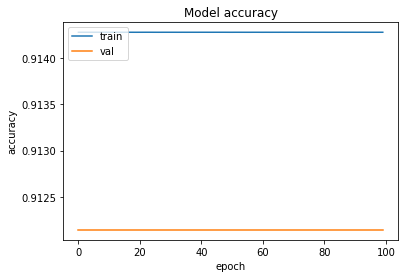

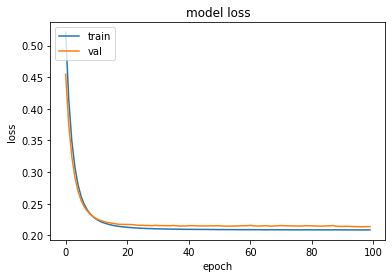

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re

path_img = Path("/content/drive/My Drive/SampleMoviePosters/")
print(history.history.keys())

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Daddy-Long-Legs (1919)
1/1 [==============================] - 0s 18ms/step
Predicted: 	 Drama
Correct answers:  Comedy Drama


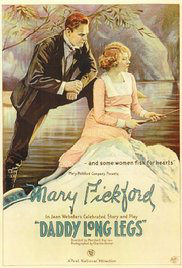

In [ ]:
img_no = np.random.randint(low = 0, high = 997)
print(title_dict[id_list[img_no]])
test_y = image_array[img_no]
test_y.shape
ty = np.reshape(test_y, (1,268,182,3))
pred_genre = model.predict(ty)
print("Predicted: \t", genres[np.argmax(pred_genre)])
print("Correct answers: ", *id_genre_dict[id_list[img_no]])
Image.fromarray(test_y)

Number of Elements: 40108 
Number of Unique Genres: 1308 
Number of Unique IMDB Scores: 85


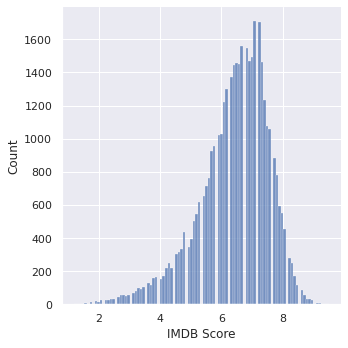

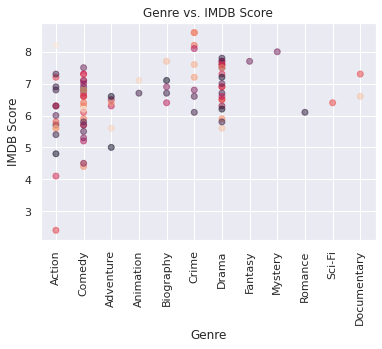

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import random
#Default theme
sns.set_theme()
import pandas as pd
#Parse through csv file and sort datapoints
dff = pd.read_csv('/content/drive/My Drive/MovieGenre.csv', encoding = "ISO-8859-1")
#dff is csv file data
print("Number of Elements:",len(dff), '\n'"Number of Unique Genres:", len(dff['Genre'].unique()), '\n'"Number of Unique IMDB Scores:",len(dff['IMDB Score'].unique()))
dff.dropna(inplace = True)
sns.displot(dff['IMDB Score'])
N = len(dff)
idx = random.sample(range(N),1000)
fig1 = plt.figure()
gd = list(dff['Genre'])
imd = list(dff['IMDB Score'])
gar = [0 for i in range(len(gd))]
# imar = [0 for i in range(len(imd))]
j=0
for i in gd:
  ar = i.split('|')
  #print(ar[0])
  gar[j] = ar[0]
  j+=1
#print(gar)
plt.scatter(gar[1:100], imd[1:100], c = np.random.rand(99), alpha = 0.5)
plt.xticks(rotation = 'vertical')
plt.title('Genre vs. IMDB Score')
plt.ylabel('IMDB Score')
plt.xlabel('Genre')
#plt.legend(['genre', 'score'], loc='upper left')
plt.show()

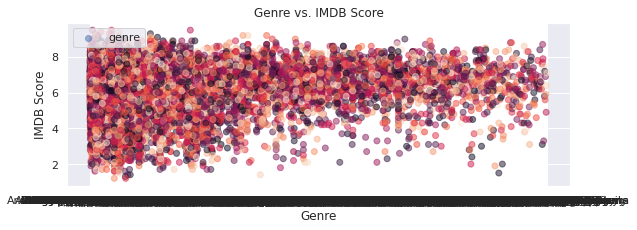

In [ ]:
plt.figure(figsize=(9,3))
plt.scatter(dff['Genre'], dff['IMDB Score'], c = np.random.rand(len(dff)), alpha = 0.5)
plt.title('Genre vs. IMDB Score')
plt.ylabel('IMDB Score')
plt.xlabel('Genre')
plt.legend(['genre', 'val'], loc='upper left')
plt.show()

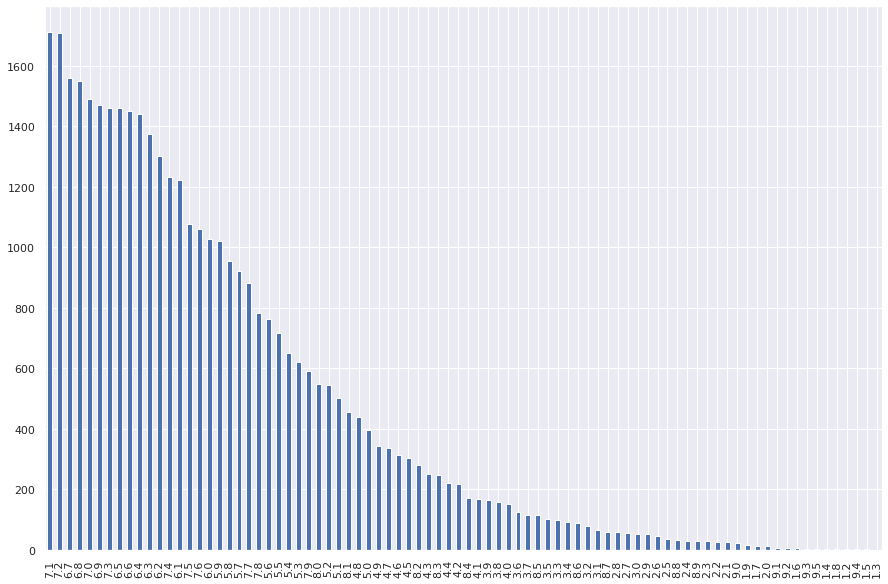

In [ ]:
fig3 = plt.gcf()
fig3.set_size_inches(15,10)
dff['IMDB Score'].value_counts().plot.bar(fig3)
print('\n')


Today We Live (1933)
1/1 [==============================] - 0s 16ms/step
Predicted: 	 Drama
Correct answers:  Drama Romance War


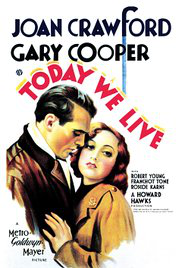

In [ ]:
img_no = np.random.randint(low = 0, high = 997)
print(title_dict[id_list[img_no]])
test_y = image_array[img_no]
test_y.shape
ty = np.reshape(test_y, (1,268,182,3))
pred_genre = model.predict(ty)
print("Predicted: \t",genres[np.argmax(pred_genre)])
print("Correct answers: ",*id_genre_dict[id_list[img_no]])
Image.fromarray(test_y)